# Exercise 7: K-means Clustering and Principal Component Analysis

In this exercise, has two major parts:
1. K-Means clustering used to compress an image.
2. Principal Component Analysis (PCA) to find low-dimensional representations of images.

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex7`

- `ex7.m` - Octave/MATLAB script for the first exercise on K-means
- `ex7_pca.m` - Octave/MATLAB script for the second exercise on PCA
- `ex7data1.mat` - Example Dataset for PCA
- `ex7data2.mat` - Example Dataset for K-means
- `ex7faces.ma` - Faces Dataset
- `bird_small.png` - Example Image
- `displayData.` - Displays 2D data stored in a matrix
- `drawLine.m` - Draws a line over an exsiting figure
- `plotDataPoints.m` - Initialization for K-means centroids
- `plotProgresskMeans.` - Plots each step of K-means as it proceeds
- `runkMeans.m` - Runs the K-means algorithm
- `submit.m` - Submission script that sends your solutions to our servers

Files to complete:

- `pca.m` - Perform principal component analysis
- `projectData.m` - Projects a data set into a lower dimensional space
- `recoverData.m` - Recovers the original data from the projection 
- `findClosestCentroids.m` - Findclosestcentroids(usedin K-means)
- `computeCentroids.m` - Compute centroid means (used in K-means)
- `kMeansInitCentroids.m` - Initialization for K-means centroids

Workflow:

- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex7.pdf`
- Whenever an exercise part is finished
  - Check it with `ex7` and `ex7_spam` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. Dataset Loading & Visualization
2. K-Means Clustering - `ex7.m`
    - 2.1 Implementing K-Means - `findClosestCentroids.m`, `computeCentroids.m`
        - 2.1.1 Simplified Algorithm Function
    - 2.2 Random Initialization - `kMeansInitCentroids.m`
    - 2.3 Image Compression with K-Means
3. Principal Component Analysis (PCA) - `ex7_pca.m`
4. PCA on Faces (Ungraded) - `ex7_pca.m`
5. Visualization of the K-Means Clusters with PCA - `ex7_pca.m`

## 0. Setup: `gnuplot`

In [8]:
graphics_toolkit ("gnuplot");

In [9]:
%plot -b inline:gnuplot

## 1. Dataset Loading & Visualization

In [10]:
% Load an example dataset that we will be using
load('ex7data2.mat');

In [11]:
who

Variables visible from the current scope:

X    ans



In [12]:
size(X)

ans =

   300     2



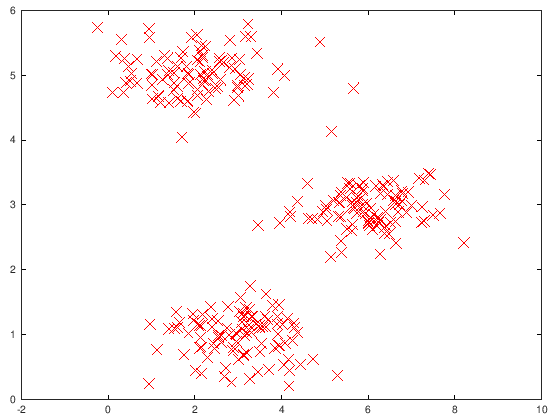

In [14]:
plot(X(:,1), X(:,2), 'rx', 'MarkerSize', 10);

## 2. K-Means Clustering - `ex7.m`

### 2.1 Implementing K-Means - `findClosestCentroids.m`, `computeCentroids.m`

In [65]:
function idx = findClosestCentroids_(X, centroids)
    % X: m x n; m: examples
    % centroids: K x n
    % idx: m x 1
    
    % Number of examples
    m = size(X,1);

    % Set K: number of centroids
    K = size(centroids, 1);

    % You need to return the following variables correctly.
    idx = zeros(size(X,1), 1);

    % Squared distances from centroid to each example (loop)
    dist2 = zeros(1,K);
    
    % Loop through all examples, all centroids
    for i = 1:m
        for k = 1:K
            d = X(i,:) - centroids(k,:);
            dist2(1,k) = d*d';
        end
        [v, ind] = min(dist2);
        idx(i,1) = ind;
    end
end

In [66]:
K = 3; % 3 Centroids
initial_centroids = [3 3; 6 2; 8 5];
idx = findClosestCentroids_(X, initial_centroids);

In [68]:
idx(1:3)

ans =

   1
   3
   2



In [94]:
function centroids = computeCentroids_(X, idx, K)

    % Useful variables
    [m n] = size(X);

    % You need to return the following variables correctly.
    centroids = zeros(K, n);

    for k = 1:K
        indices = find(idx == k);
        centroids(k,:) = mean(X(indices,:));
    end

end

In [87]:
centroids = computeCentroids_(X, idx, K);

In [93]:
centroids

centroids =

   1.9540   5.0256
   3.0437   1.0154
   6.0337   3.0005



#### 2.1.1 Simplified Algorithm Function

The original function is in `runkMeans.m` and plots the progress of the algorithm: dataset points are visualized in group colors and the centroids are moved progressively leaving a trail. It is executed from `ex7.m`.

In [98]:
function [centroids, idx] = runkMeans_(X, initial_centroids, max_iters)

    % Initialize values
    [m n] = size(X);
    K = size(initial_centroids, 1);
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = zeros(m, 1);

    % Run K-Means
    for i=1:max_iters

        % For each example in X, assign it to the closest centroid
        idx = findClosestCentroids_(X, centroids);

        % Given the memberships, compute new centroids
        centroids = computeCentroids_(X, idx, K);
    end

end

In [99]:
% Load an example dataset
load('ex7data2.mat');
% Settings for running K-Means
K = 3;
max_iters = 10;
% Initial centroids - they should be random examples
initial_centroids = [3 3; 6 2; 8 5];
% Run K-Means algorithm
[centroids, idx] = runkMeans_(X, initial_centroids, max_iters);

In [100]:
centroids

centroids =

   1.9540   5.0256
   3.0437   1.0154
   6.0337   3.0005



### 2.2 Random Initialization - `kMeansInitCentroids.m`

In [105]:
function centroids = kMeansInitCentroids_(X, K)
    centroids = zeros(K, size(X, 2));
    % Randomly reorder the indices of examples
    randidx = randperm(size(X, 1));
    % Take the first K examples as centroids
    centroids = X(randidx(1:K), :);
end

In [106]:
centroids = kMeansInitCentroids_(X, 3)

centroids =

   2.3978   1.2472
   2.1270   0.9567
   4.3047   1.1073



### 2.3 Image Compression with K-Means

There is nothing to be implemented in this section, just go through the code called in `ex7.m`. A simplified version of the code is below:

In [108]:
%  Load an image of a bird
A = double(imread('bird_small.png'));
A = A / 255; % Divide by 255 so that all values are in the range 0 - 1
% Size of the image
img_size = size(A);

In [109]:
% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

In [110]:
% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

In [111]:
% When using K-Means, initialize the centroids randomly. 
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


In [118]:
% After k-means finished, get the final cenroids for each pixel
% Find closest cluster members
idx = findClosestCentroids(X, centroids);

In [119]:
% Compress
X_compressed = centroids(idx,:);

In [120]:
% Reshape the recovered image into proper dimensions
X_compressed = reshape(X_compressed, img_size(1), img_size(2), 3);

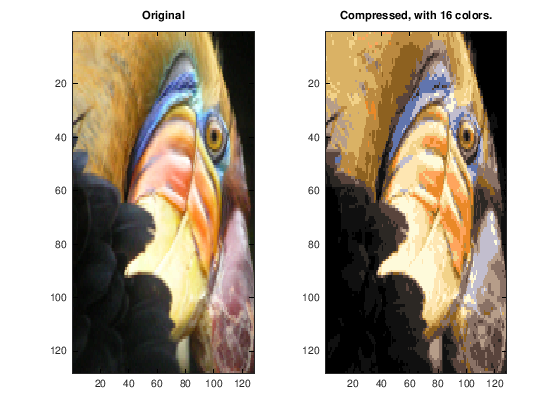

In [121]:
% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');
% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_compressed)
title(sprintf('Compressed, with %d colors.', K));

## 3. Principal Component Analysis (PCA)

In [124]:
% The following command loads the dataset.
clear; close all;
load ('ex7data1.mat');

In [127]:
who

Variables visible from the current scope:

X



In [128]:
size(X)

ans =

   50    2



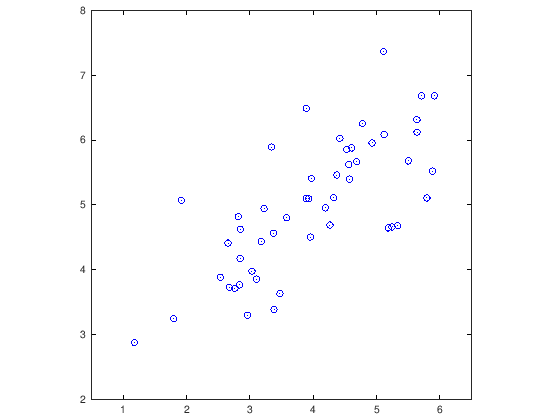

In [126]:
% Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

### 3.1 Implementing PCA - `pca.m`

In [129]:
function [U, S] = pca_(X)
    % PCA Run principal component analysis on the dataset X
    % [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
    % Returns the eigenvectors U, the eigenvalues (on diagonal) in S

    % Useful values
    [m, n] = size(X);

    % You need to return the following variables correctly.
    U = zeros(n);
    S = zeros(n);

    % Covariance matrix
    Sigma = (1/m) * X' * X;

    % Singular Value Decomposition:
    % Eigenvectors: U (columns)
    % EIgenvalues: S (diagonal)
    [U, S, V] = svd(Sigma);
end

In [130]:
%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca_(X_norm);

In [131]:
U

U =

  -0.7071  -0.7071
  -0.7071   0.7071



In [132]:
S

S =

Diagonal Matrix

   1.7008        0
        0   0.2592



### 3.2 Dimensionality Reduction with PCA - `projectData.m`, `recoverData.m`

In [135]:
function Z = projectData_(X, U, K)

    % You need to return the following variables correctly.
    Z = zeros(size(X, 1), K);

    % Take first K columns / eigenvectors
    U_reduced = U(:,1:K);

    % Project the X examples to the reduced space of K <= n features
    % In order to figure out the order and whether transpose or not
    % draw the matrices and think of what we want to get
    Z = U_reduced' * X';
    Z = Z';

end

In [136]:
%  Project the data onto K = 1 dimension
K = 1;
Z = projectData_(X_norm, U, K);

In [138]:
Z(1:5)

ans =

   1.4813
  -0.9129
   1.2121
   1.6273
   1.2604



In [139]:
function X_rec = recoverData_(Z, U, K)
    % You need to return the following variables correctly.
    X_rec = zeros(size(Z, 1), size(U, 1));

    % Instructions: Compute the approximation of the data by projecting back
    %               onto the original space using the top K eigenvectors in U.
    %
    %               For the i-th example Z(i,:), the (approximate)
    %               recovered data for dimension j is given as follows:
    %                    v = Z(i, :)';
    %                    recovered_j = v' * U(j, 1:K)';
    %
    %               Notice that U(j, 1:K) is a row vector.
    %               

    % U: n x n
    % Z: m x K
    % X_rec: m x n

    % Since we are undoing the mapping
    % I would have expected that we need to invert the rotation
    % Since U*U' = I, U' = inv(U)
    % Then, we would have taken again the first K columns
    UT = U'; % n x n
    %X_rec = UT(:, 1:K)*Z'; % n x m
    % BUT: The logic above does not work
    X_rec = U(:, 1:K)*Z'; % n x m
    X_rec = X_rec'; % m x n
end


In [140]:
X_rec  = recoverData_(Z, U, K);

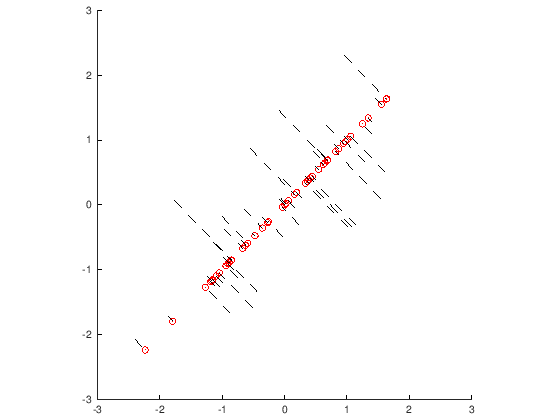

In [146]:
% Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
axis([-3 3 -3 3]); axis square;
for i = 1:size(X_norm, 1)
    %drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
    p1 = X_norm(i,:);
    p2 = X_rec(i,:);
    plot([p1(1) p2(1)], [p1(2) p2(2)], '--k', 'LineWidth', 1);
end
hold off

## 4. PCA on Faces (Ungraded) - `ex7_pca.m`

No code needs to be written for the following exercises, since they use the functions already created above; the lines have been taken from `ex7_pca.m`.

In [156]:
%  Load Face dataset
clear all;
load ('ex7faces.mat')

In [157]:
who

Variables visible from the current scope:

X



In [158]:
% 5000 images, 32 x 32 gray pixels each = 1024 pixels
size(X)

ans =

   5000   1024



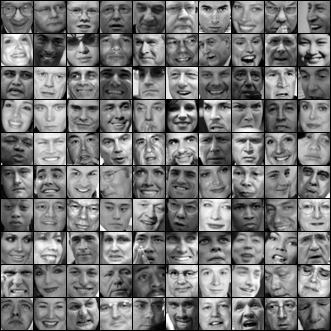

In [159]:
% Display the first 100 faces in the dataset
displayData(X(1:100, :));

### 4.1 Normalize Features and Apply PCA, and Visualize

In [160]:
[X_norm, mu, sigma] = featureNormalize(X);

In [161]:
[U, S] = pca(X_norm);

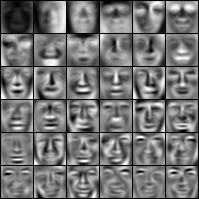

In [162]:
% Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

In [163]:
% Compress to 100 features
K = 100;
Z = projectData(X_norm, U, K);

In [164]:
% Recover
K = 100;
X_rec  = recoverData(Z, U, K);

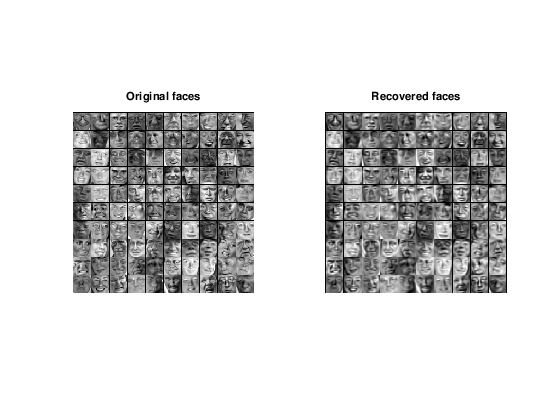

In [165]:
% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

## 5. Visualization of the K-Means Clusters with PCA - `ex7_pca.m`

No code needs to be written for the following exercises, since they use the functions already created above; the lines have been taken from `ex7_pca.m`.

In [167]:
close all;
A = double(imread('bird_small.png'));

In [168]:
% Normalize and apply k-means on the image pixels, which have 3 dimensions (RGB)
A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


In [176]:
% Sample 1000 random indexes/pixels
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

In [177]:
% Now, we project 3D data onto 2D with PCA
% 1. Normalize
[X_norm, mu, sigma] = featureNormalize(X);
% 2. PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

Program paused. Press enter to continue.


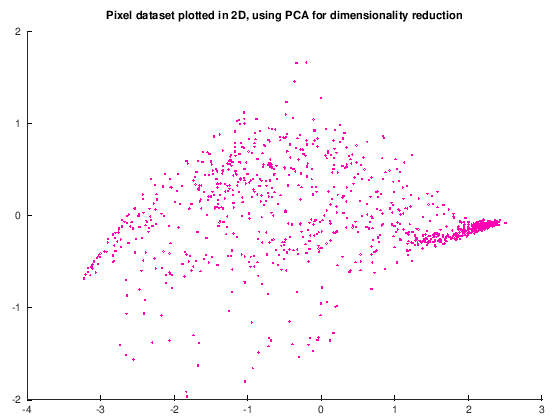

In [180]:
% Plot in 2D
figure;
% Something does not work with the palette / cluster coloring...
% No time to fix it...
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
fprintf('Program paused. Press enter to continue.\n');